In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_pickle("/content/drive/MyDrive/Artificial_Intelligence_Engineering/AIA/2_CarPricesData.pkl")

In [4]:
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [5]:
df.isnull().sum()

Age         0
KM          0
Weight      0
HP          0
MetColor    0
CC          0
Doors       0
Price       0
dtype: int64

In [6]:
df.groupby("Doors")['Weight'].max()

Doors
2    1115.0
3    1320.0
4    1160.0
5    1320.0
Name: Weight, dtype: float64

In [ ]:
df.columns

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['Age', 'KM', 'Weight', 'HP', 'CC']] = sc.fit_transform(df[['Age', 'KM', 'Weight', 'HP', 'CC']])
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,0.278481,0.193355,0.515625,0.170732,1,1.0,3,13500
1,0.278481,0.300149,0.515625,0.170732,1,1.0,3,13750
2,0.291139,0.171647,0.515625,0.170732,1,1.0,3,13950
3,0.316456,0.197528,0.515625,0.170732,0,1.0,3,14950
4,0.367089,0.158433,0.531250,0.170732,0,1.0,3,13750


<Axes: xlabel='Age'>

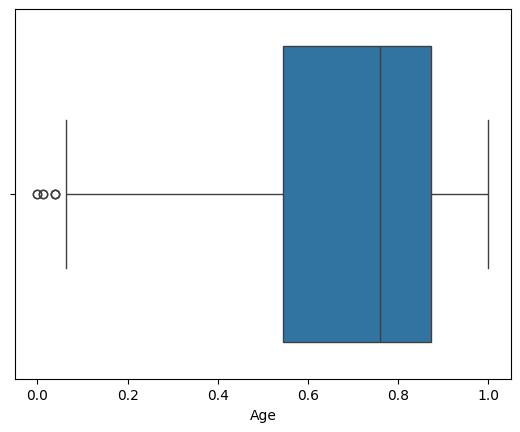

In [9]:
# Handling outliers
# Task

import seaborn as sns

sns.boxplot(x='Age',data=df)

In [8]:
# Spiting data
X = df.iloc[:,:-1]
y = df['Price']

In [ ]:
X.shape

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 7)
(359, 7)
(1076,)
(359,)


In [ ]:
1076/20

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   float64
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   float64
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 100.9 KB


In [13]:
df['Price'] = df['Price'].astype('float32')

In [14]:
y_train = y_train.astype('float32')

In [ ]:
df.info()

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from keras import Sequential

In [ ]:
x_train.shape

(1076, 7)

In [15]:
from keras import Sequential

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from keras.models import Sequential

In [19]:
# Model building
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import r2_score

model = Sequential()
model.add(Dense(units=16,input_dim=7,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units = 32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='he_uniform'))

model.compile(loss='mean_squared_error',optimizer='adam', metrics=[tf.keras.metrics.R2Score()])
model.fit(x_train,y_train,batch_size=20,epochs=100,verbose=1)

Epoch 1/100
54/54 [==============================] - 1s 4ms/step - loss: 128068704.0000 - r2_score: -8.8615
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 127296688.0000 - r2_score: -8.8020
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 124052168.0000 - r2_score: -8.5522
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 113417376.0000 - r2_score: -7.7333
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 88404360.0000 - r2_score: -5.8072
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 51211840.0000 - r2_score: -2.9434
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 22912412.0000 - r2_score: -0.7643
Epoch 8/100
54/54 [==============================] - 0s 3ms/step - loss: 15423284.0000 - r2_score: -0.1876
Epoch 9/100
54/54 [==============================] - 0s 3ms/step - loss: 14903405.0000 - r2_score: -0.1476
Epoch 10/100
54/54 [=============

In [ ]:
# Do EDA and domain analysis
# Check if you have outliers
# Try other scaling option
# Increase the hidden layers
# train for more epochs---- 100

In [ ]:
y_test = y_test.astype("float32")

In [ ]:
model.evaluate(x_test,y_test)